In [1]:
%matplotlib inline

import os
import sys
import math
import tables as tb
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors

In [2]:
import invisible_cities.reco.dst_functions as dstf
import invisible_cities.core.fit_functions as fitf
import antea.database.load_db              as db

from   invisible_cities.core .stat_functions    import poisson_sigma
from   invisible_cities.core .system_of_units_c import units
from   invisible_cities.io   .dst_io            import load_dst

In [3]:
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = 13, 9

In [4]:
true_r1, true_phi1, true_z1 = [], [], []
reco_r1, reco_phi1, reco_z1 = [], [], []
true_r2, true_phi2, true_z2 = [], [], []
reco_r2, reco_phi2, reco_z2 = [], [], []

sns_response1, sns_response2    = [], []

### PETsys thresholds to extract the timestamp
timestamp_thr = [0, 0.25, 0.5, 0.75]
first_sipm1   = [[] for i in range(len(timestamp_thr))]
first_sipm2   = [[] for i in range(len(timestamp_thr))]
first_time1   = [[] for i in range(len(timestamp_thr))]
first_time2   = [[] for i in range(len(timestamp_thr))]

true_t1, true_t2                     = [], []
touched_sipms1, touched_sipms2       = [], []
phot1, phot2                         = [], []
max_hit_distance1, max_hit_distance2 = [], []
hit_energy1, hit_energy2             = [], []

event_ids = []

filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-phantom-paper/data_coincidences_paola/full_body_phantom_paper_coincidences_0_10_4_4_4_2.npz'

for filename in os.listdir(filepath):
    if filename.endswith('.npz'):
        #print(filename)
        my_file = filepath+filename
        d   = np.load(my_file)
            
        true_r1   = np.concatenate((true_r1,   d['a_true_r1']))
        true_phi1 = np.concatenate((true_phi1, d['a_true_phi1']))
        true_z1   = np.concatenate((true_z1,   d['a_true_z1']))   
            
        reco_r1   = np.concatenate((reco_r1,   d['a_reco_r1']))
        reco_phi1 = np.concatenate((reco_phi1, d['a_reco_phi1']))  
        reco_z1   = np.concatenate((reco_z1,   d['a_reco_z1']))  
        
        true_r2   = np.concatenate((true_r2,   d['a_true_r2']))
        true_phi2 = np.concatenate((true_phi2, d['a_true_phi2']))
        true_z2   = np.concatenate((true_z2,   d['a_true_z2']))   
            
        reco_r2   = np.concatenate((reco_r2,   d['a_reco_r2']))
        reco_phi2 = np.concatenate((reco_phi2, d['a_reco_phi2']))  
        reco_z2   = np.concatenate((reco_z2,   d['a_reco_z2']))  
        
        true_t1 = np.concatenate((true_t1, d['a_true_time1']))
        true_t2 = np.concatenate((true_t2, d['a_true_time2']))
        
        touched_sipms1 = np.concatenate((touched_sipms1, d['a_touched_sipms1']))
        touched_sipms2 = np.concatenate((touched_sipms2, d['a_touched_sipms2']))
        sns_response1  = np.concatenate((sns_response1,  d['a_sns_response1']))
        sns_response2  = np.concatenate((sns_response2,  d['a_sns_response2']))
        
        phot1             = np.concatenate((phot1, d['a_photo1']))
        phot2             = np.concatenate((phot2, d['a_photo2']))
        max_hit_distance1 = np.concatenate((max_hit_distance1, d['a_max_hit_distance1']))
        max_hit_distance2 = np.concatenate((max_hit_distance2, d['a_max_hit_distance2']))
        hit_energy1       = np.concatenate((hit_energy1, d['a_hit_energy1']))
        hit_energy2       = np.concatenate((hit_energy2, d['a_hit_energy2']))
        
        event_ids = np.concatenate((event_ids, d['a_event_ids']))
        
        for i in range(len(timestamp_thr)):
            first_time1[i] = np.concatenate((first_time1[i], d[f'a_first_time1_{i+1}']))
            first_time2[i] = np.concatenate((first_time2[i], d[f'a_first_time2_{i+1}']))
            
            first_sipm1[i] = np.concatenate((first_sipm1[i], d[f'a_first_sipm1_{i+1}']))
            first_sipm2[i] = np.concatenate((first_sipm2[i], d[f'a_first_sipm2_{i+1}']))

        
true_r1   = np.array(true_r1)
true_phi1 = np.array(true_phi1)
true_z1   = np.array(true_z1)

reco_r1   = np.array(reco_r1)
reco_phi1 = np.array(reco_phi1)
reco_z1   = np.array(reco_z1)

true_r2   = np.array(true_r2)
true_phi2 = np.array(true_phi2)
true_z2   = np.array(true_z2)

reco_r2   = np.array(reco_r2)
reco_phi2 = np.array(reco_phi2)
reco_z2   = np.array(reco_z2)

true_t1 = np.array(true_t1)
true_t2 = np.array(true_t2)

first_time1 = np.array(first_time1)
first_time2 = np.array(first_time2)
first_sipm1 = np.array(first_sipm1)
first_sipm2 = np.array(first_sipm2)

sns_response1 = np.array(sns_response1)
sns_response2 = np.array(sns_response2)

phot1             = np.array(phot1)
phot2             = np.array(phot2)
max_hit_distance1 = np.array(max_hit_distance1)
max_hit_distance2 = np.array(max_hit_distance2)
hit_energy1       = np.array(hit_energy1)
hit_energy2       = np.array(hit_energy2)

event_ids = np.array(event_ids)

true_x1 = true_r1 * np.cos(true_phi1)
reco_x1 = reco_r1 * np.cos(reco_phi1)
true_y1 = true_r1 * np.sin(true_phi1)
reco_y1 = reco_r1 * np.sin(reco_phi1)
true_x2 = true_r2 * np.cos(true_phi2)
reco_x2 = reco_r2 * np.cos(reco_phi2)
true_y2 = true_r2 * np.sin(true_phi2)
reco_y2 = reco_r2 * np.sin(reco_phi2)

In [5]:
#print(true_r1, true_phi1, true_z1, reco_r1, reco_phi1, reco_z1, 
#      true_r2, true_phi2, true_z2, reco_r2, reco_phi2, reco_z2)
#print(first_time1, first_time2, first_sipm1, first_sipm2)
#print(sns_response1, sns_response2, phot1, phot2)
#print(max_hit_distance1, max_hit_distance1, hit_energy1, hit_energy2, event_ids)

In [6]:
print(f'Number of reconstructed coincidences: {len(event_ids)}')

Number of reconstructed coincidences: 3566214


In [7]:
### change by hand phi reconstructed as true=~3.14, reco~=-3.14
reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.] = -reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.]
reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.] = -reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.]

true_x   = np.concatenate((true_x1, true_x2))
true_y   = np.concatenate((true_y1, true_y2))
true_r   = np.concatenate((true_r1, true_r2))
true_phi = np.concatenate((true_phi1, true_phi2))
true_z   = np.concatenate((true_z1, true_z2))

reco_x   = np.concatenate((reco_x1, reco_x2))
reco_y   = np.concatenate((reco_y1, reco_y2))
reco_r   = np.concatenate((reco_r1, reco_r2))
reco_phi = np.concatenate((reco_phi1, reco_phi2))
reco_z   = np.concatenate((reco_z1, reco_z2))

true_t = np.concatenate((true_t1, true_t2))

sns_response     = np.concatenate((sns_response1, sns_response2))
phot             = np.concatenate((phot1, phot2))
max_hit_distance = np.concatenate((max_hit_distance1, max_hit_distance2))
hit_energy       = np.concatenate((hit_energy1, hit_energy2))

n_int = len(true_x) # number of interactions

In [8]:
d1 = true_r1 - reco_r1
d2 = true_r2 - reco_r2
diff_r_matrix = np.concatenate((d1, d2))

d1_phi = true_phi1 - reco_phi1
d2_phi = true_phi2 - reco_phi2
diff_phi_matrix = np.concatenate((d1_phi, d2_phi))

d1_z = true_z1 - reco_z1
d2_z = true_z2 - reco_z2
diff_z_matrix = np.concatenate((d1_z, d2_z))

In [9]:
### read sensor positions from database
DataSiPM     = db.DataSiPMsim_only('petalo', 0)
DataSiPM_idx = DataSiPM.set_index('SensorID')

speed_in_vacuum = 0.299792458# * units.mm / units.ps
ave_speed_in_LXe = 0.210 #* units.mm / units.ps

In [10]:
### Positions
pos_1 = np.array([reco_x1, reco_y1, reco_z1]).transpose()
pos_2 = np.array([reco_x2, reco_y2, reco_z2]).transpose()
dist1 = [[] for j in range(4)]
dist2 = [[] for j in range(4)]
for j in range(4):
    sipm_pos_1 = np.array([DataSiPM_idx.loc[first_sipm1[j]].X, DataSiPM_idx.loc[first_sipm1[j]].Y, DataSiPM_idx.loc[first_sipm1[j]].Z]).transpose()
    sipm_pos_2 = np.array([DataSiPM_idx.loc[first_sipm2[j]].X, DataSiPM_idx.loc[first_sipm2[j]].Y, DataSiPM_idx.loc[first_sipm2[j]].Z]).transpose()

    ### Distance of the interaction point from the SiPM seeing the first photon
    dist1[j].append(np.linalg.norm(np.subtract(pos_1, sipm_pos_1), axis=1))
    dist2[j].append(np.linalg.norm(np.subtract(pos_2, sipm_pos_2), axis=1))

In [11]:
diff_t_matrix      = [[] for j in range(4)]
diff_reco_t_matrix = [[] for j in range(4)]
for j in range(4):
    d1_t = true_t1 - first_time1[j]
    d2_t = true_t2 - first_time2[j]
    diff_t_matrix[j].append((np.concatenate((d1_t, d2_t))).flatten())
    
    reco_t1   = np.array(first_time1[j]) - (np.array(dist1[j])/ave_speed_in_LXe)
    reco_t2   = np.array(first_time2[j]) - (np.array(dist2[j])/ave_speed_in_LXe)
    d1_reco_t = true_t1 - reco_t1
    d2_reco_t = true_t2 - reco_t2
    diff_reco_t_matrix[j].append((np.concatenate((d1_reco_t, d2_reco_t))).flatten())

In [12]:
print('Fraction of photoelectric interactions = {0}'    .format(len(phot[phot == True])/n_int))
print('Fraction of not photoelectric interactions = {0}'.format(len(phot[phot == False])/n_int))

Fraction of photoelectric interactions = 0.06525351535269616
Fraction of not photoelectric interactions = 0.9347464846473038


### Some inspection of photoelectrics

1028.593017578125
0.05319000408053398


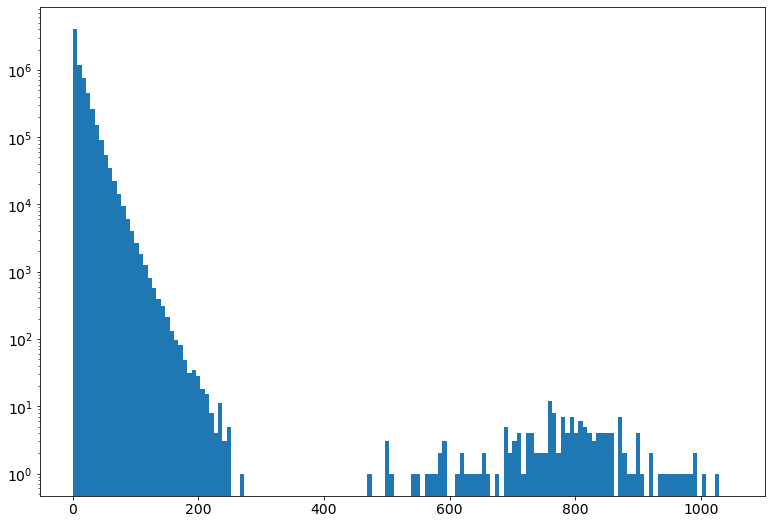

In [13]:
print(max(max_hit_distance))
print(min(max_hit_distance))
h = plt.hist(max_hit_distance, bins=150, range=(0,1050))
plt.yscale('log');

153


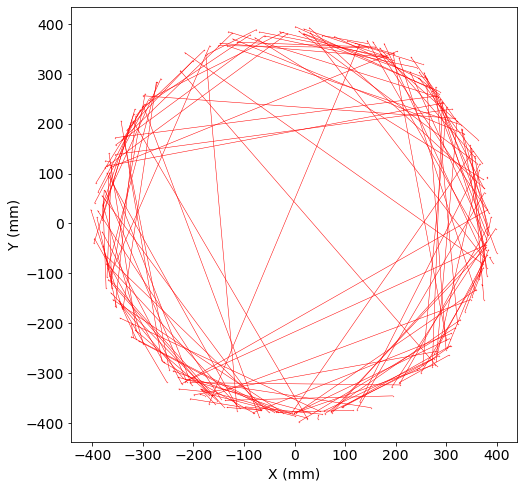

In [14]:
out = 0
plt.figure(figsize=(8,8))
sel = max_hit_distance > 400
dists = []
for (tx, ty, rx, ry) in zip(true_x[sel], true_y[sel], reco_x[sel], reco_y[sel]):
    xs = np.array([tx, rx])
    ys = np.array([ty, ry])
    dist = np.sqrt((tx-rx)**2 + (ty-ry)**2)
    dists.append(dist)
    if dist > 50:
        out += 1
    plt.plot(xs, ys, '.', markersize=0.5, linestyle='-', linewidth=0.5, c='r')
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
dists = np.array(dists)
print(out)

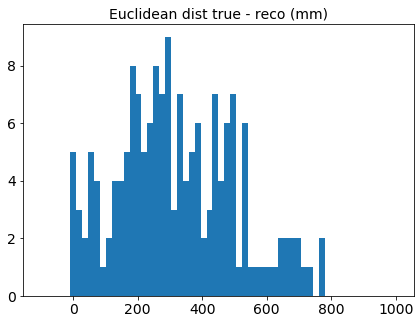

In [15]:
plt.figure(figsize=(7,5))
plt.hist(dists, 60, (-100,1000))
plt.title('Euclidean dist true - reco (mm)', fontsize=14);

In [16]:
print(np.sort(event_ids[max_hit_distance1 > 400])[0])
np.sort(event_ids[max_hit_distance1 > 400])[0] - 30000*78 

2340726.0


726.0

In [17]:
d1 = 1 #mm Phot like events
sel_phot_like1  = max_hit_distance < d1
sel_compt_like1 = max_hit_distance > d1

d2 = 2 #mm Phot like events
sel_phot_like2  = max_hit_distance < d2
sel_compt_like2 = max_hit_distance > d2

d3 = 3 #mm Phot like events
sel_phot_like3  = max_hit_distance < d3
sel_compt_like3 = max_hit_distance > d3

d4 = 4 #mm Phot like events
sel_phot_like4  = max_hit_distance < d4
sel_compt_like4 = max_hit_distance > d4

d5 = 5 #mm Phot like events
sel_phot_like5  = max_hit_distance < d5
sel_compt_like5 = max_hit_distance > d5

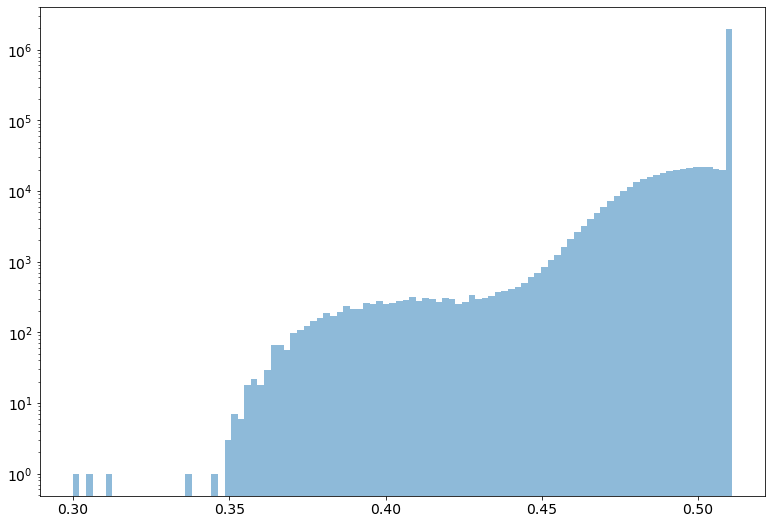

In [18]:
good_e = hit_energy[sel_phot_like1]
plt.hist(good_e, bins=100, alpha=0.5)
plt.yscale('log')
plt.show()

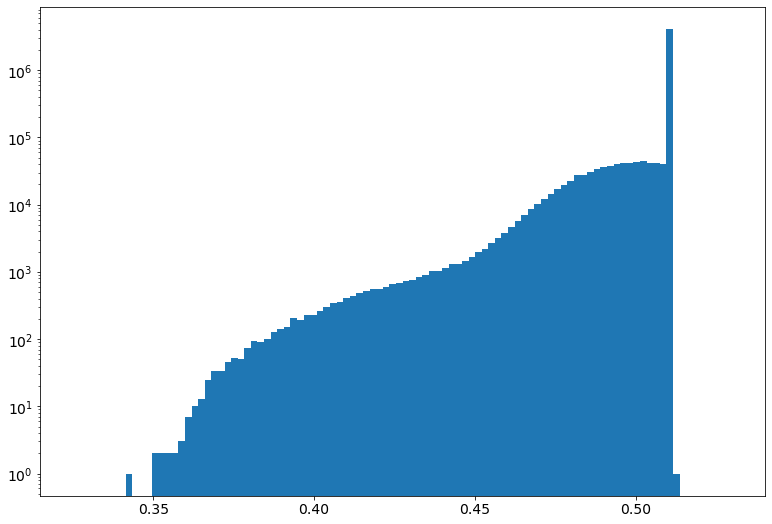

In [19]:
bad_e = hit_energy[sel_compt_like1]
h = plt.hist(bad_e, range=(0.325, 0.53), bins=100);
plt.yscale('log')

### Error matrices

### R

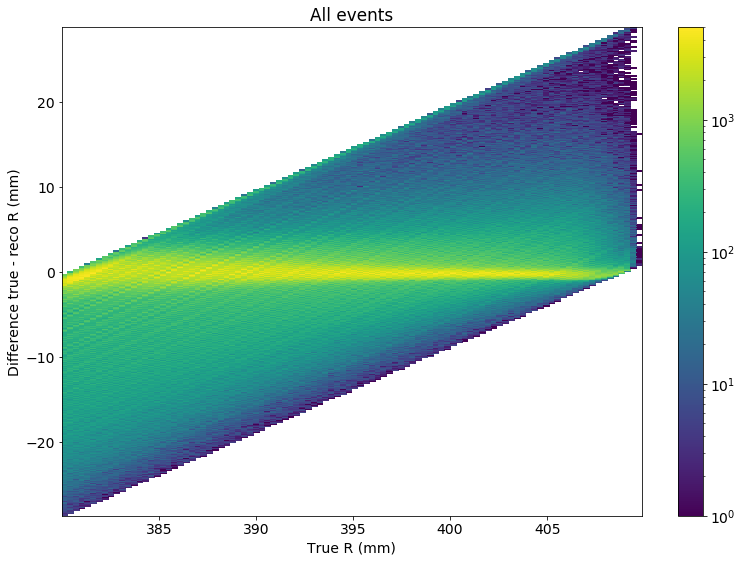

In [20]:
## all events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r, diff_r_matrix, bins=(100, 500), norm=mp_colors.LogNorm())
plt.title('All events')
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();
#plt.ylim(-5,5)

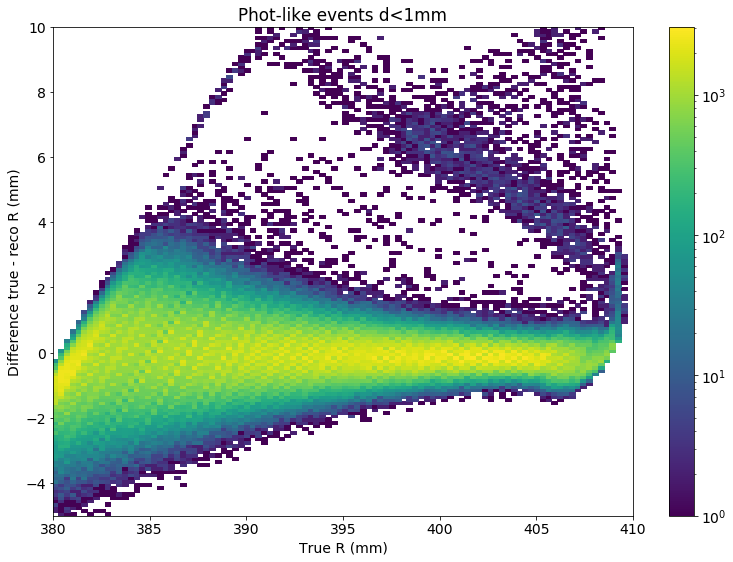

In [26]:
## Photoelectric-like events d1
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like1],
                                            diff_r_matrix[sel_phot_like1],
                                            bins=(100, 150), 
                                            range=((380, 410), (-5, 10)),
                                            norm=mp_colors.LogNorm())
plt.title(f'Phot-like events d<{d1}mm')
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

In [27]:
## Photoelectric-like events d2
#h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like2],
#                                            diff_r_matrix[sel_phot_like2],
#                                            bins=(100, 150), norm=mp_colors.LogNorm())
#plt.title(f'Phot-like events d<{d2}mm')
#plt.xlabel('True R (mm)')
#plt.ylabel('Difference true - reco R (mm)');
#plt.colorbar();

In [28]:
## Photoelectric-like events d3
#h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like3],
#                                            diff_r_matrix[sel_phot_like3],
#                                            bins=(100, 150), norm=mp_colors.LogNorm())
#plt.title(f'Phot-like events d<{d3}mm')
#plt.xlabel('True R (mm)')
#plt.ylabel('Difference true - reco R (mm)');
#plt.colorbar();

In [29]:
## Photoelectric-like events d4
#h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like4],
#                                            diff_r_matrix[sel_phot_like4],
#                                            bins=(100, 150), norm=mp_colors.LogNorm())
#plt.title(f'Phot-like events d<{d4}mm')
#plt.xlabel('True R (mm)')
#plt.ylabel('Difference true - reco R (mm)');
#plt.colorbar();

In [30]:
## Photoelectric-like events d5
#h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like5],
#                                            diff_r_matrix[sel_phot_like5],
#                                            bins=(100, 150), norm=mp_colors.LogNorm())
#plt.title(f'Phot-like events d<{d5}mm')
#plt.xlabel('True R (mm)')
#plt.ylabel('Difference true - reco R (mm)');
#
#plt.colorbar();

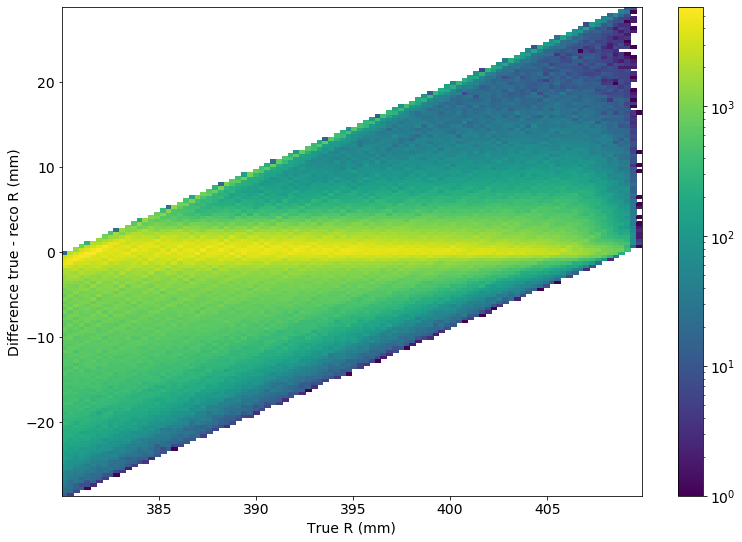

In [31]:
## not photoelectric-like events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_compt_like1],
                                            diff_r_matrix[sel_compt_like1],
                                            bins=(100, 150), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

## Phi

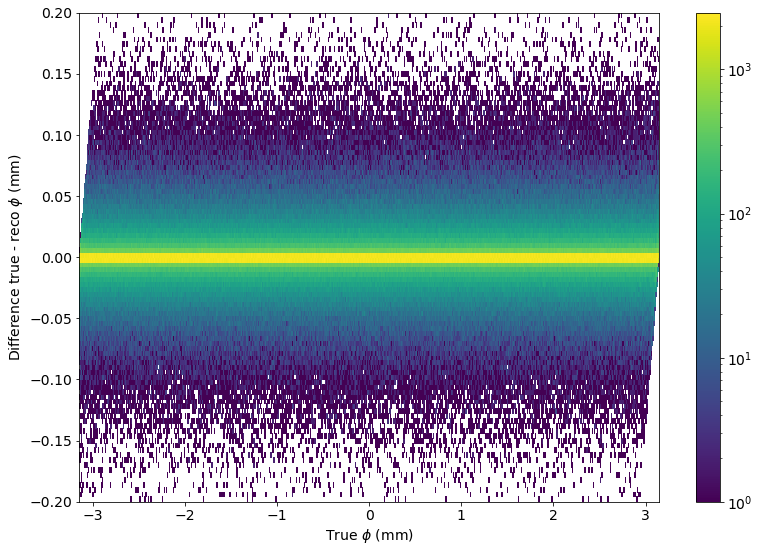

In [44]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi, 
                                                    diff_phi_matrix,
                                                    bins=(1000, 100),
                                                    range=((-3.15, 3.15), (-0.2, 0.2)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

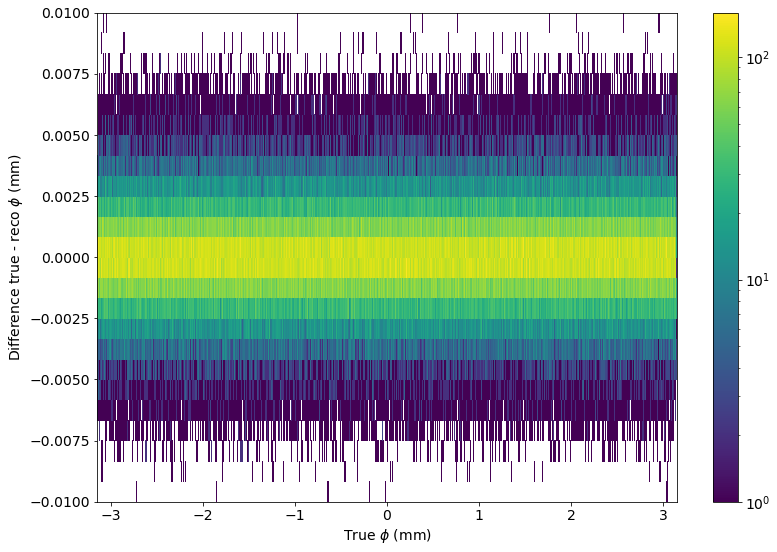

In [46]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_phot_like1], 
                                                    diff_phi_matrix[sel_phot_like1],
                                                    bins=(5166, 24), 
                                                    range=((-3.15, 3.15), (-0.01, 0.01)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

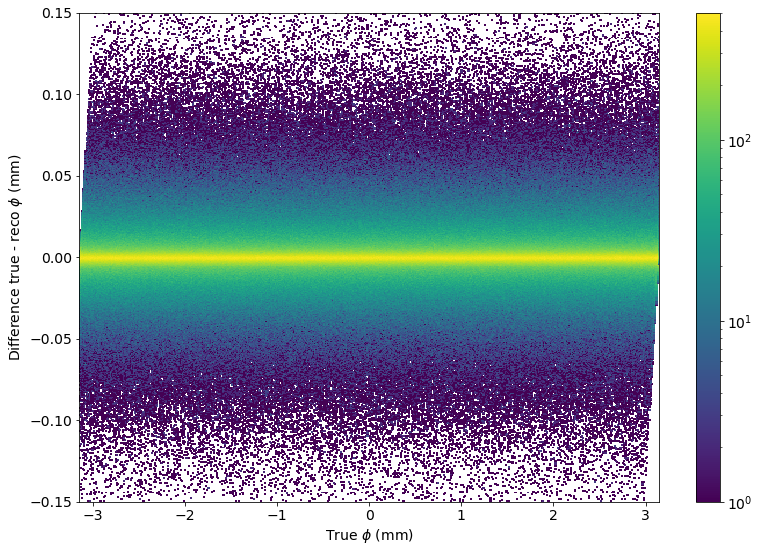

In [37]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_compt_like1], 
                                                    diff_phi_matrix[sel_compt_like1],
                                                    bins=(500, 500), 
                                                    range=((-3.15, 3.15), (-0.15, 0.15)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

## Z

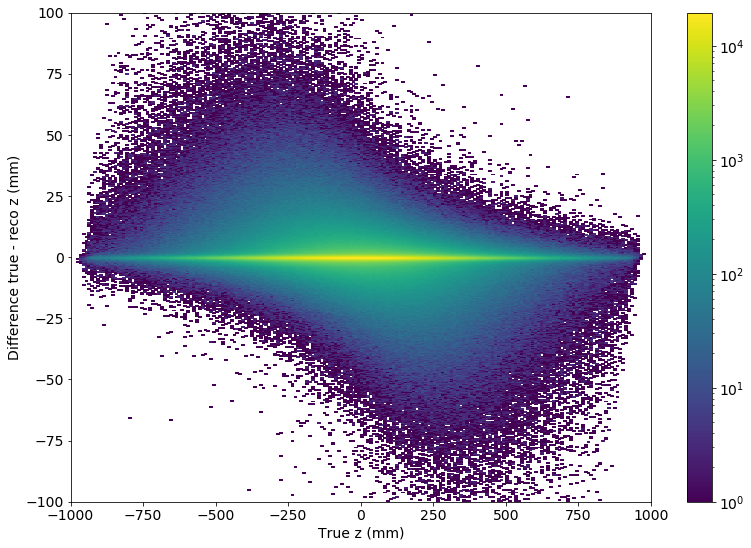

In [49]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z, diff_z_matrix, bins=(200, 500),
                                            range=((-1000, 1000), (-100, 100)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

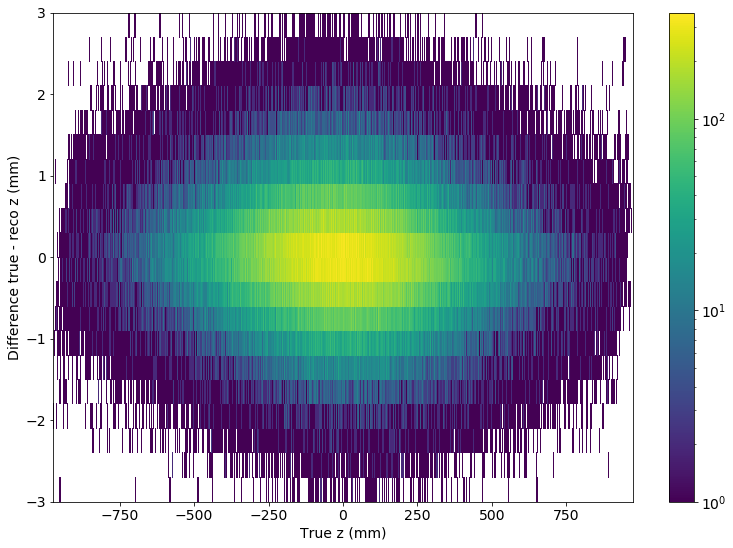

In [53]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_phot_like1],
                                            diff_z_matrix[sel_phot_like1], 
                                            bins=(6500, 20),
                                            range=((-975, 975), (-3, 3)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

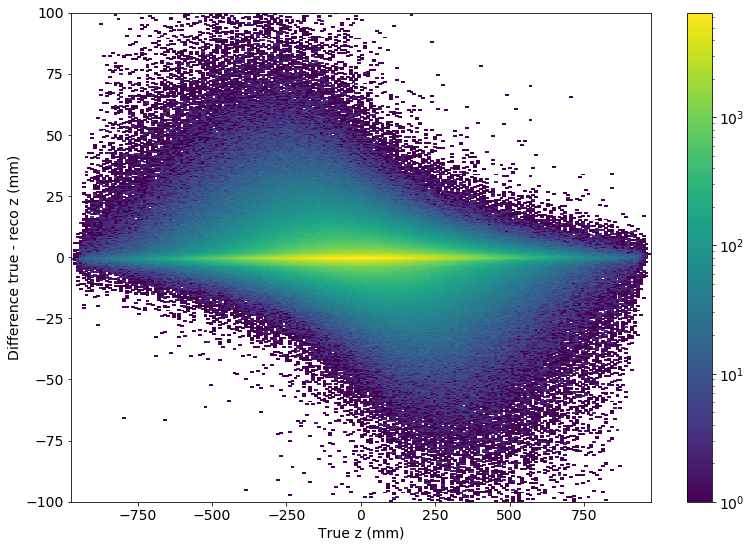

In [55]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_compt_like1],
                                            diff_z_matrix[sel_compt_like1], 
                                            bins=(200, 500),
                                            range=((-975, 975), (-100, 100)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

## Time

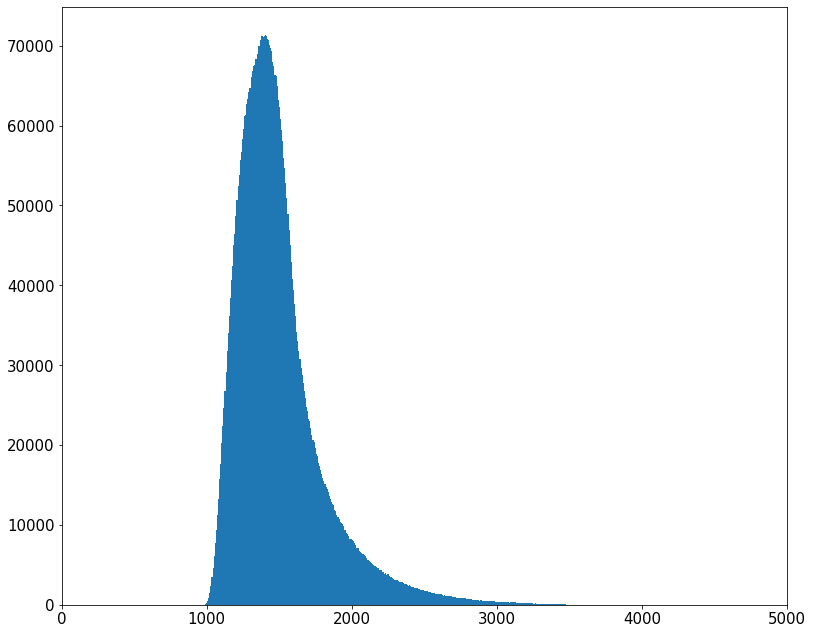

In [40]:
plt.hist(true_t, 500)
plt.xlim(0,5000);

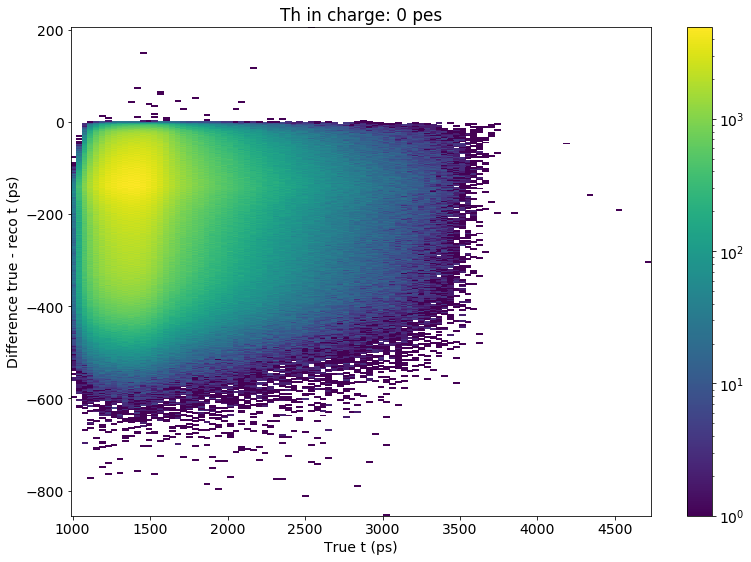

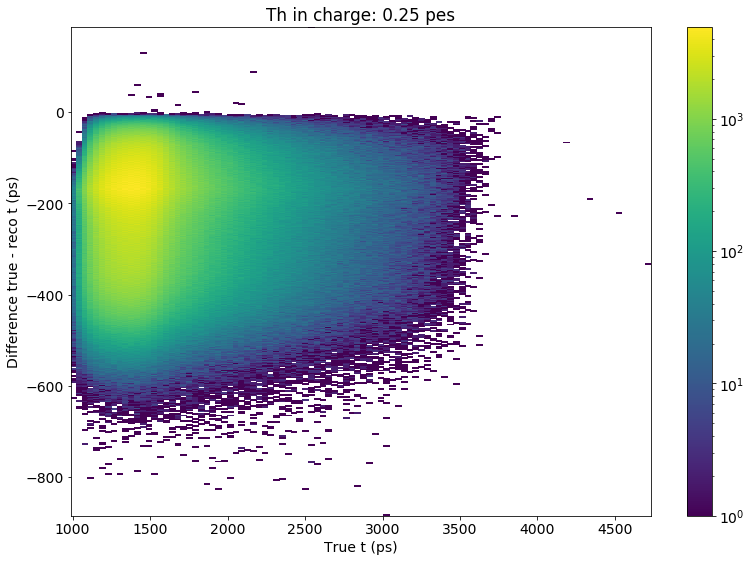

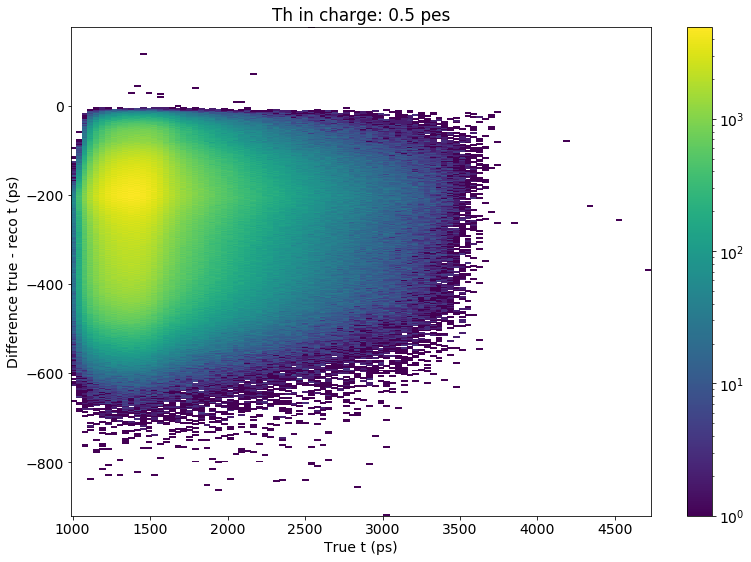

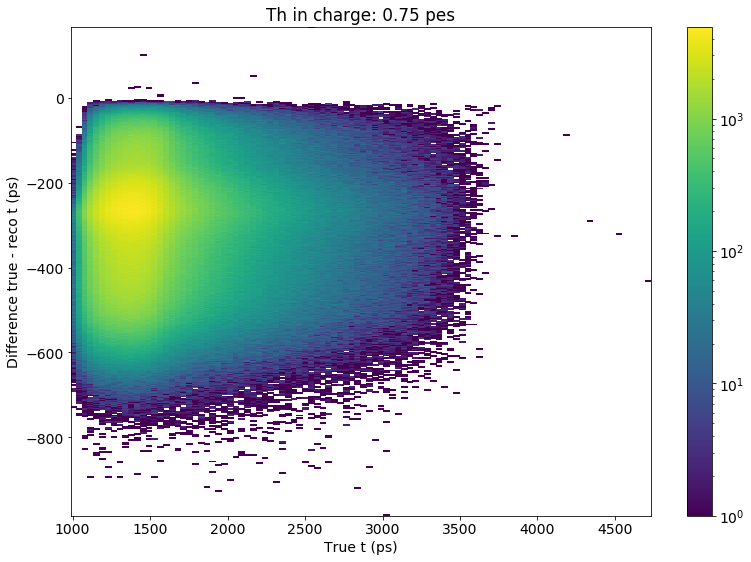

In [56]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_t_matrix[j][0], bins=(100, 500),
                                                norm=mp_colors.LogNorm())
    
    #plt.xlim(1000,6000)
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()

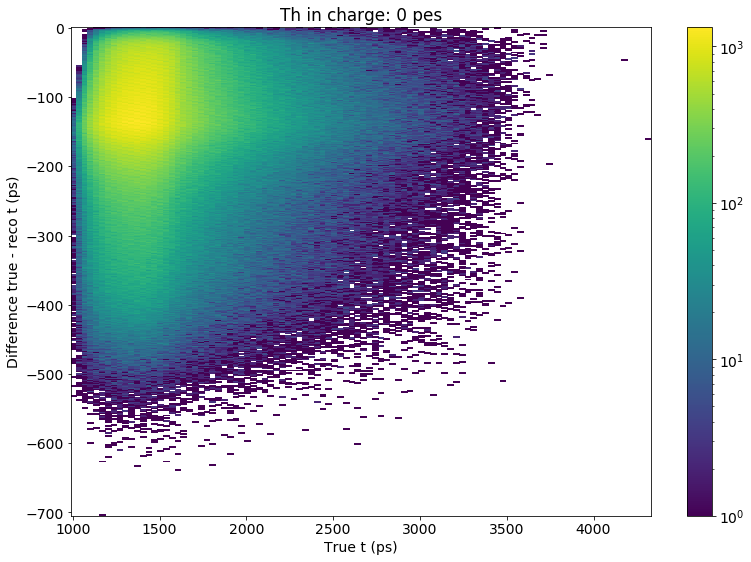

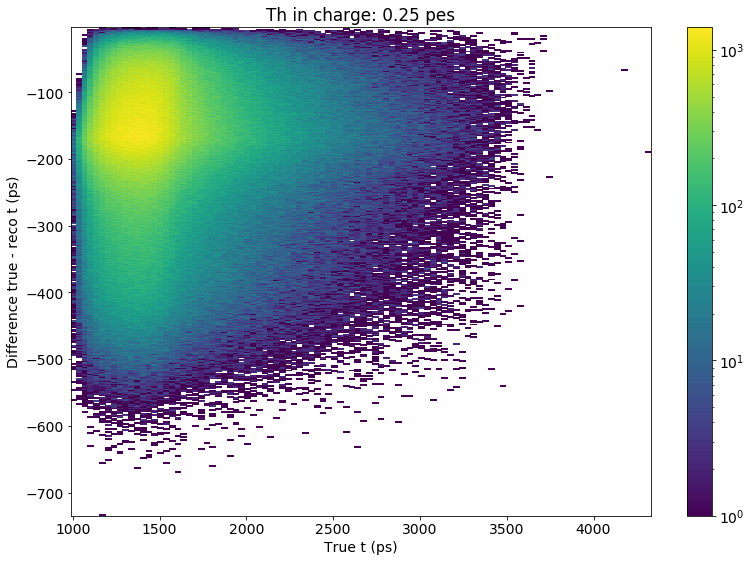

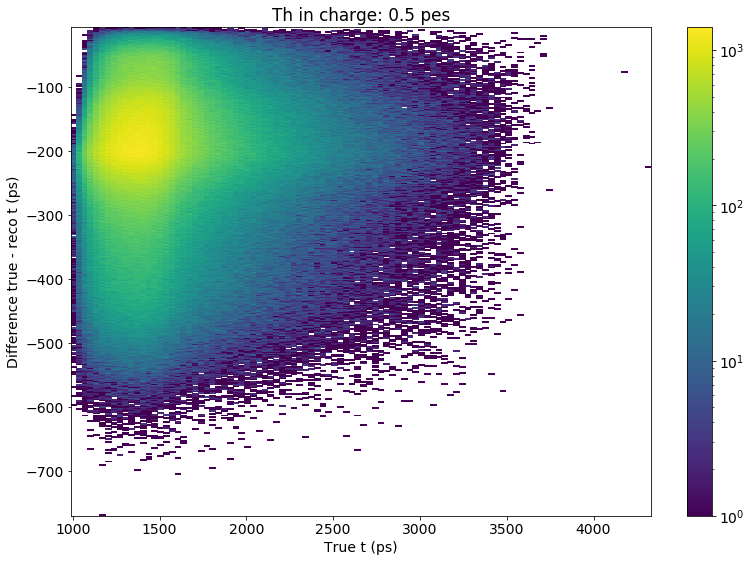

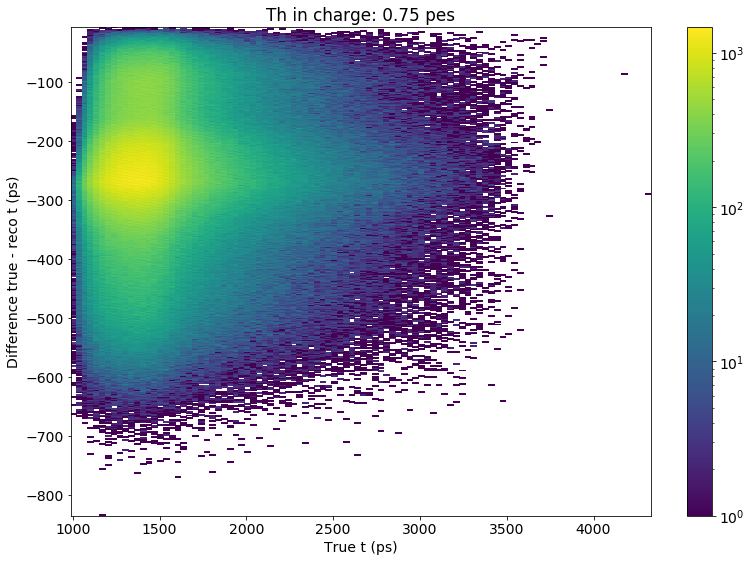

In [57]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_phot_like1], 
                                                diff_t_matrix[j][0][sel_phot_like1], 
                                                bins=(100, 500),
                                                norm=mp_colors.LogNorm())
    
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()

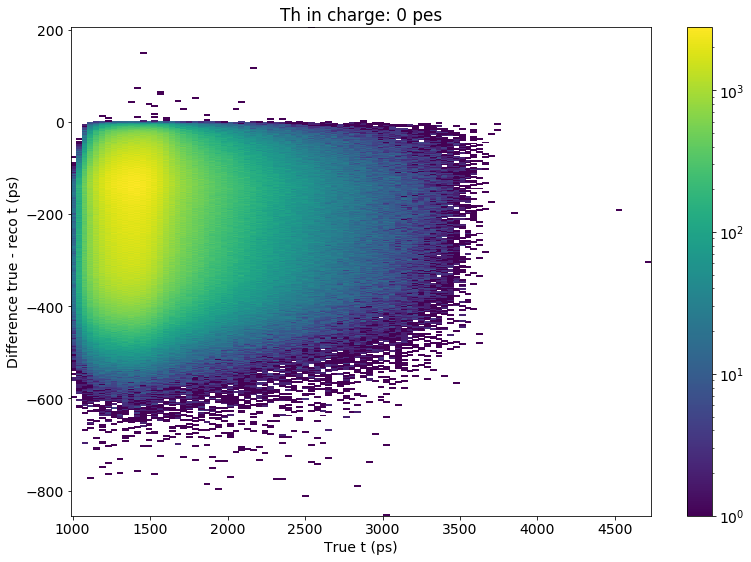

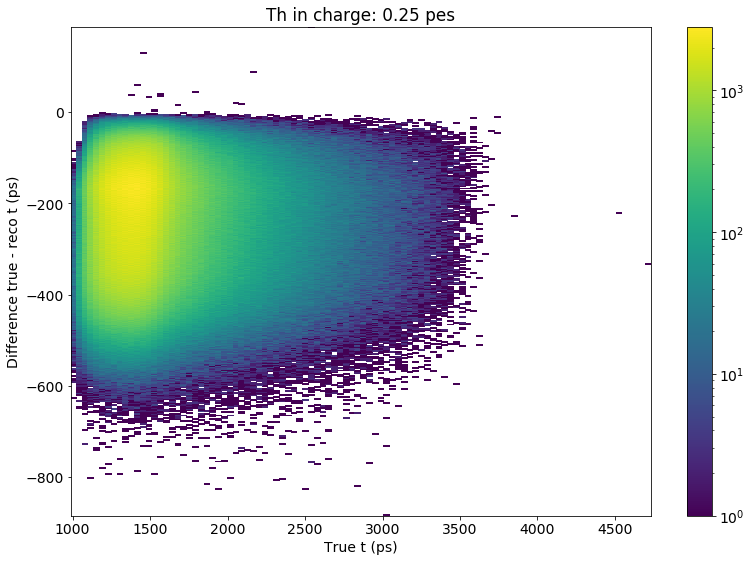

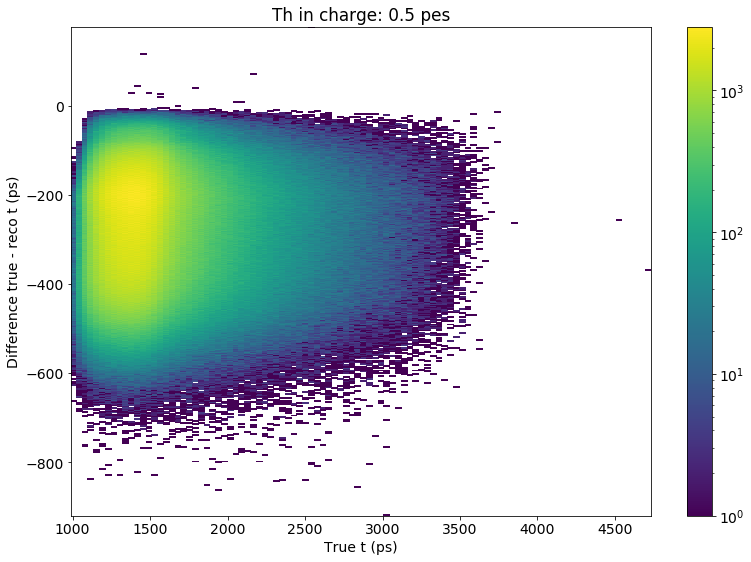

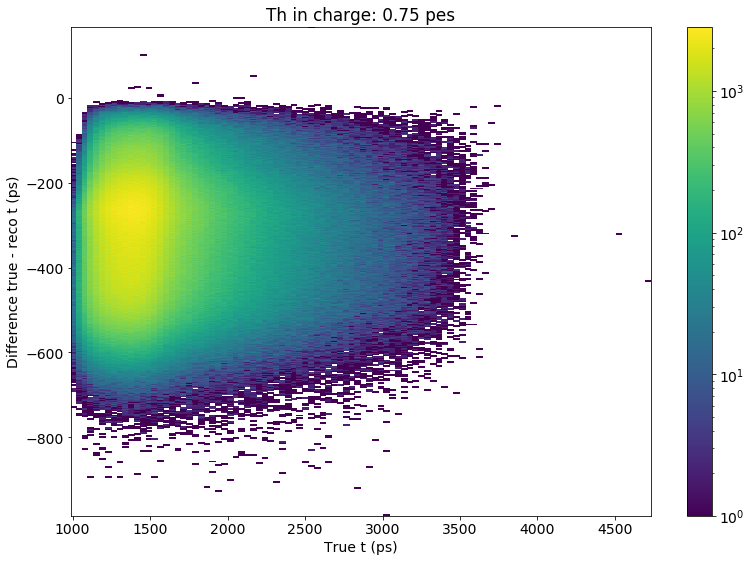

In [58]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like1], 
                                                diff_t_matrix[j][0][sel_compt_like1], 
                                                bins=(100, 500),
                                                norm=mp_colors.LogNorm())
    
    #plt.xlim(1000,6000)
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()

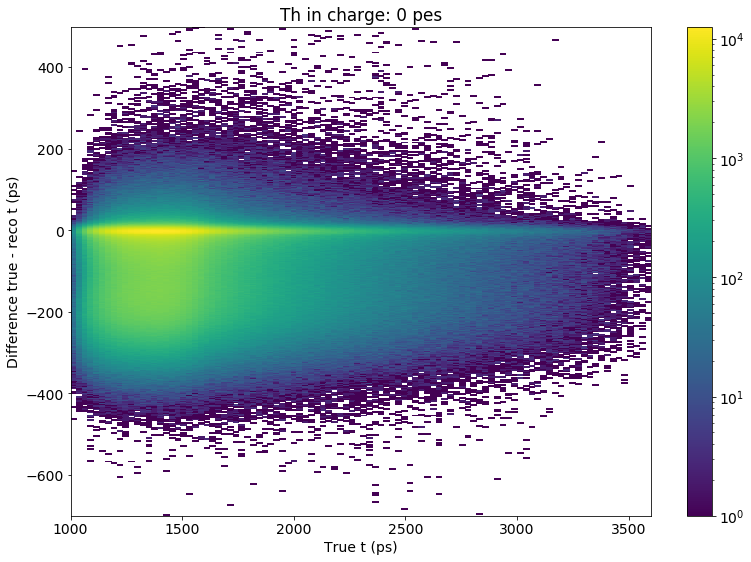

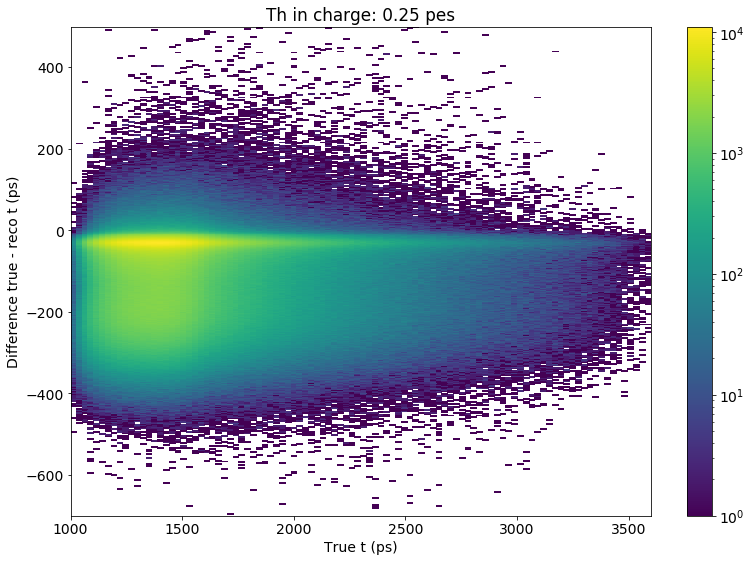

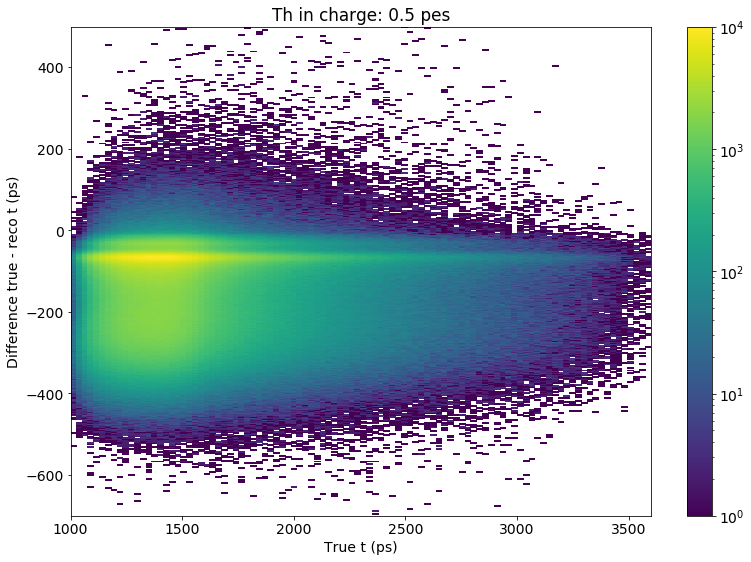

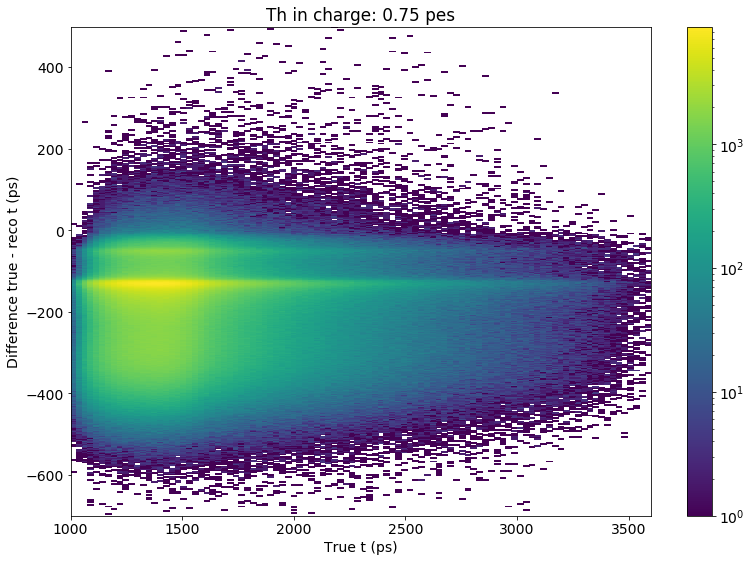

In [61]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_reco_t_matrix[j][0],
                                                bins=(100, 500),
                                                range=((1000, 3600), (-700, 500)),
                                                norm=mp_colors.LogNorm())
        
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()

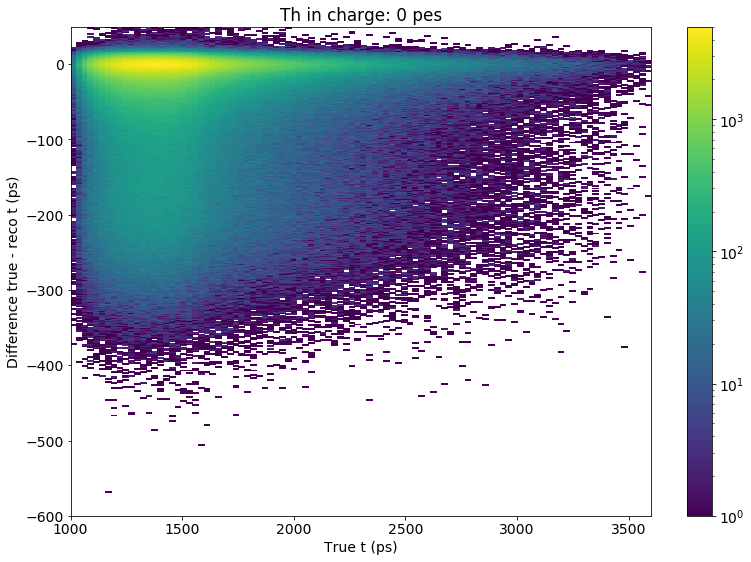

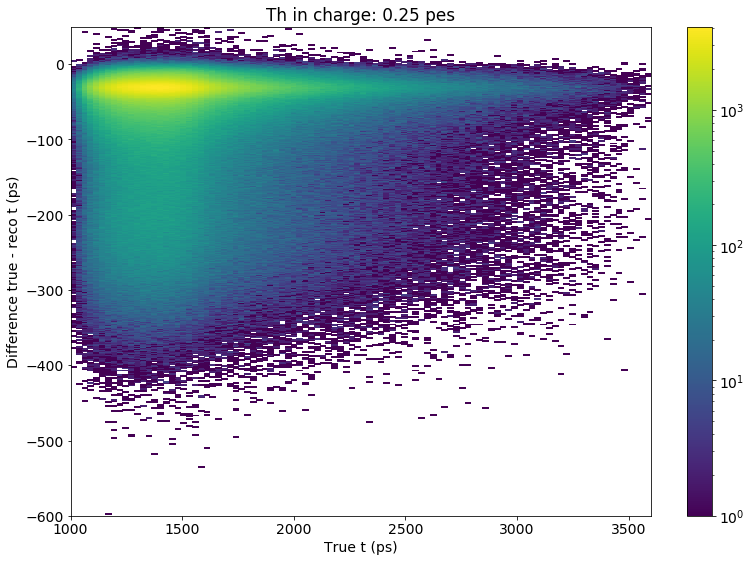

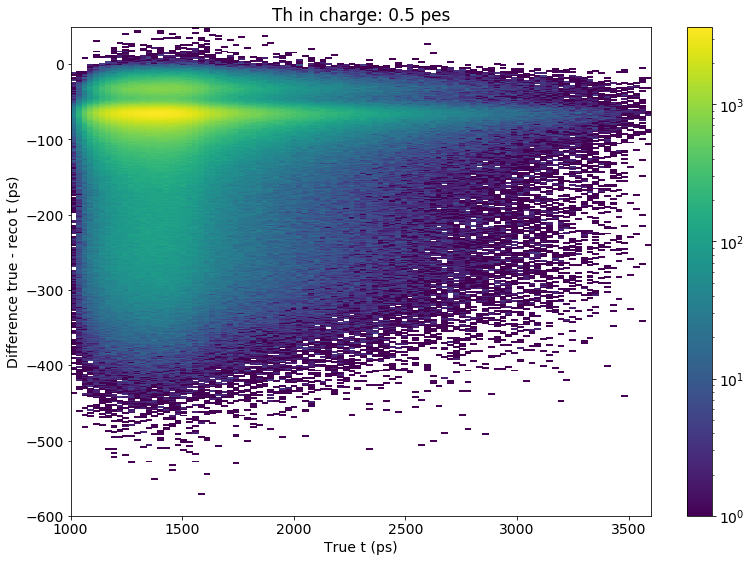

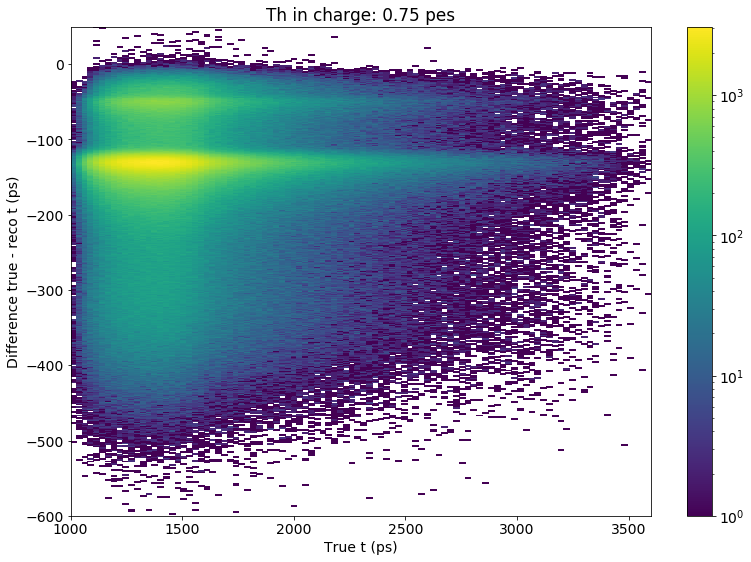

In [76]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_phot_like1], 
                                                diff_reco_t_matrix[j][0][sel_phot_like1],
                                                bins=(100, 500),
                                                range=((1000, 3600), (-600, 50)),
                                                norm=mp_colors.LogNorm())
    #plt.hlines(10, 1000, 3500, color='r')
    #plt.hlines(-520, 1000, 3500, color='r')
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()

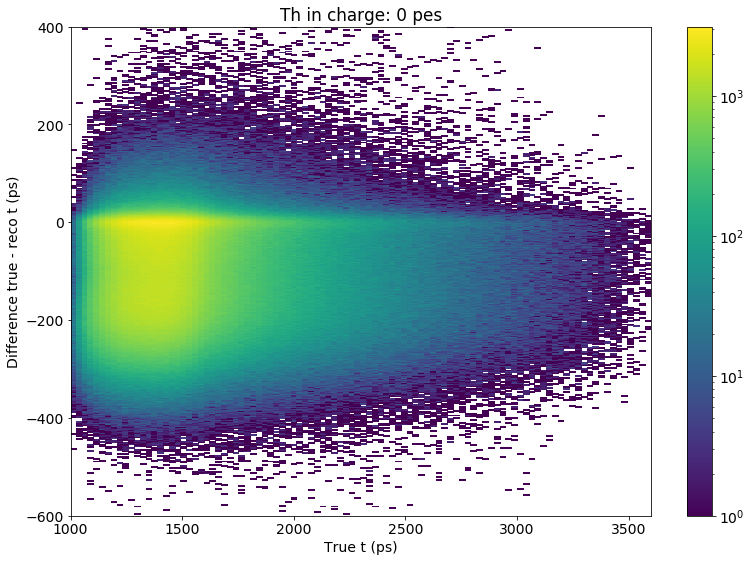

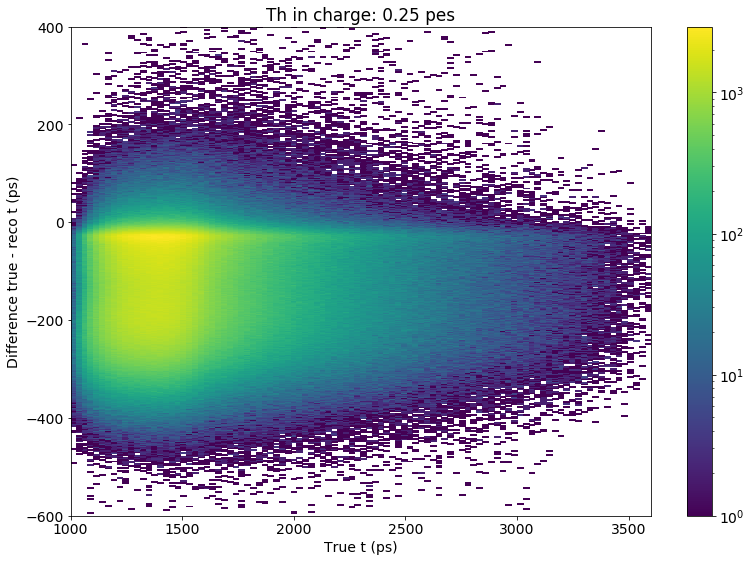

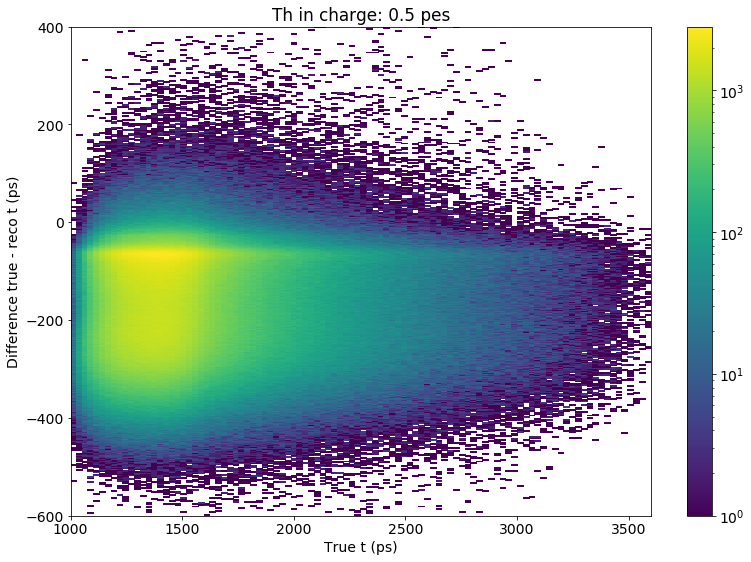

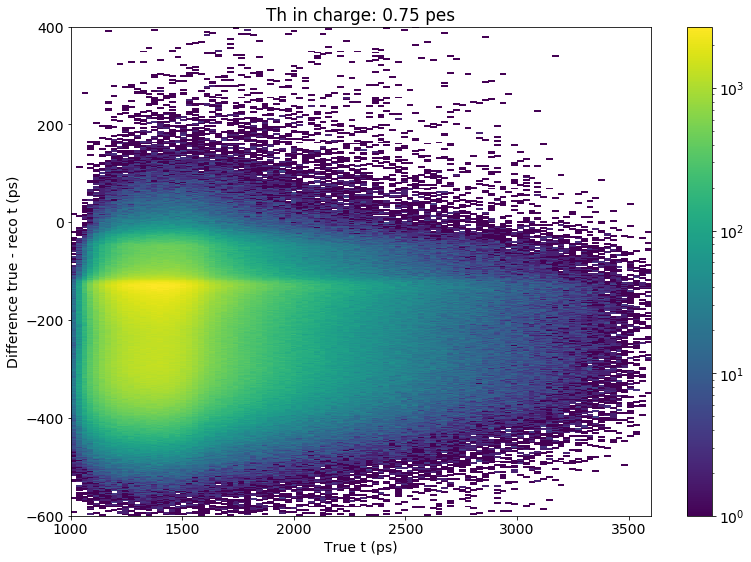

In [77]:
for j,th in enumerate(timestamp_thr):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like1], 
                                                diff_reco_t_matrix[j][0][sel_compt_like1],
                                                bins=(100, 500),
                                                range=((1000, 3600), (-600, 400)),
                                                norm=mp_colors.LogNorm())
    #plt.hlines( 250, 1000, 3500, color='r')
    #plt.hlines(-550, 1000, 3500, color='r')
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.colorbar()
    plt.show()